In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

import pickle

In [2]:
data = pd.read_csv('../data/residence_addresses_googlestreetview_clean.csv', index_col=0)
labels = pd.read_csv('../labels/labels_final.csv', index_col='MBL').drop(['Unnamed: 0'], axis = 1)

In [3]:
data = data.fillna(data.mean())
data = data.merge(labels, on = 'MBL')
predictors = data.drop(['MBL', 'has_parking'], axis = 1)
scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)
# remove anything over 2.5 standard deviations out
non_outliers = (predictors > 2.5).any(axis = 1)
predictors_removed_outliers = predictors[non_outliers, :]

In [4]:
target = data[['has_parking', 'MBL']]
target['keep'] = non_outliers
target = target.loc[target.keep == 1, 'has_parking']
# target = data.iloc[non_outliers, 'has_parking']

/Users/anthonyrentsch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
pca = PCA(n_components=10)
pca_res = pca.fit_transform(predictors_removed_outliers)

In [6]:
print('variance explained by first two PC: ',sum(pca.explained_variance_ratio_[:2]))

variance explained by first two PC:  0.1415475820207271


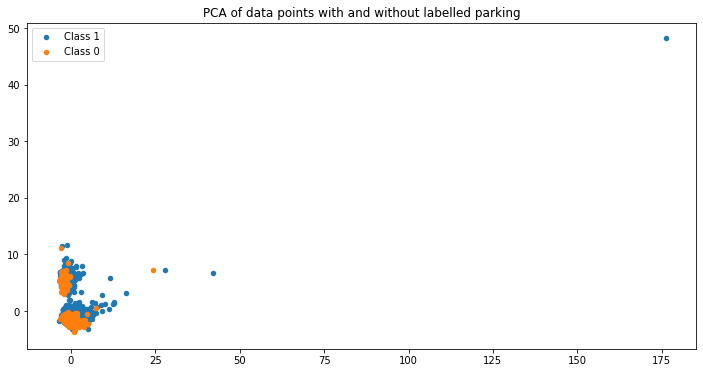

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(pca_res[np.array((target == 1)),0], pca_res[np.array((target == 1)),1], s = 20, label = 'Class 1')
plt.scatter(pca_res[np.array((target == 0)),0], pca_res[np.array((target == 0)),1], s = 20,  label = 'Class 0')
plt.title('PCA of data points with and without labelled parking')
plt.legend()
plt.show()

In this plot, we were hoping for separation between the two clusters. But there are several issues starting with the face that the first two principal components only account for 12% of the variation. Further, this plot provides some intuition for why synthetic data generation for minority class oversampling isn't working -- we have quite some separation between the two classes so linear interpolation wouldn't be efective.

----